In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import load_workbook

In [2]:
def compare(file_name: str) -> None:
    # Load the audio signal and its sampling rate
    signal, sr = librosa.load(f'../../../test_signals/{file_name}.wav', sr=None)

    # Load the F0 data from WaveSurfer and Algorithm method
    f0s_wave_surfer = np.loadtxt(f'../data/wavesurfer/{file_name}.f0', dtype=float)
    f0s_wave_surfer = f0s_wave_surfer[:, 0]
    
    f0s = np.loadtxt(f'../data/cepstrum_based_pitch_detection/{file_name}.txt', dtype=float)

    # Ensure both F0 arrays have the same length by padding with zeros
    if len(f0s_wave_surfer) < len(f0s):
        f0s_wave_surfer = np.pad(f0s_wave_surfer, (0, len(f0s) - len(f0s_wave_surfer)), 'constant')
    else:
        f0s = np.pad(f0s, (0, len(f0s_wave_surfer) - len(f0s)), 'constant')

    # Tạo mảng mới cho F0 sạch
    f0_wave_surfer_cleaned = np.zeros_like(f0s_wave_surfer)
    
    # Chỉ giữ lại các giá trị F0 tại chỉ số mà F0s không bằng 0
    for i in range(len(f0s)):
        if f0s[i] != 0:  # Giữ lại chỉ số mà F0s không bằng 0
            f0_wave_surfer_cleaned[i] = f0s_wave_surfer[i]

    # Create a DataFrame to hold the F0 values
    df = pd.DataFrame({
        'F0_WaveSurfer': f0_wave_surfer_cleaned,
        'F0_Cepstrum based pitch': f0s
    })

    # Create a DataFrame to hold the F0 values
    df = pd.DataFrame({
        'F0_WaveSurfer': f0_wave_surfer_cleaned,
        'F0_Cepstrum based pitch': f0s
    })

    # Remove rows where both columns are zero
    df = df[(df['F0_WaveSurfer'] != 0) | (df['F0_Cepstrum based pitch'] != 0)]

    # Add a Result column to show the absolute difference
    df['Result'] = abs(df['F0_WaveSurfer'] - df['F0_Cepstrum based pitch'])

    # Save to Excel file
    output_file = f'../results/cepstrum/F0_comparison_{file_name}.xlsx'
    df.to_excel(output_file, index=False)

    # Open the Excel file to add the AVERAGE
    wb = load_workbook(output_file)
    ws = wb.active

    # Calculate the average of the Result column
    average_result = df['Result'].mean()

    ws['D1'] = 'AVERAGE'
    ws['D2'] = average_result 

    # Save the changes
    wb.save(output_file)

    # Create the plot
    plt.figure(figsize=(20, 10))
    plt.suptitle(file_name)

    # First subplot: Plot the signal with x-axis in seconds
    plt.subplot(2, 1, 1)
    plt.title('Signal')
    time_signal = np.arange(len(signal)) / sr  # Convert samples to seconds
    plt.plot(time_signal, signal)
    plt.xlabel('Time (s)')  # x-axis label in seconds
    plt.ylabel('Amplitude')

    # margin between subplots
    plt.subplots_adjust(hspace=0.5)

    # Second subplot: Plot F0 with x-axis in seconds
    plt.subplot(2, 1, 2)
    plt.title('F0s')

    # Convert frame indices to time (seconds)
    frame_step = 0.015  # 15 ms frame step
    x = np.arange(len(f0_wave_surfer_cleaned)) * frame_step  # Time in seconds

    plt.scatter(x, f0_wave_surfer_cleaned, label='F0s WaveSurfer', s=20, alpha=0.6)
    plt.scatter(x, f0s, label='F0s Algorithm', s=20, alpha=0.6)
    plt.xlabel('Time (s)')  # x-axis label in seconds
    plt.ylabel('F0 (Hz)')
    plt.legend()
    plt.show()


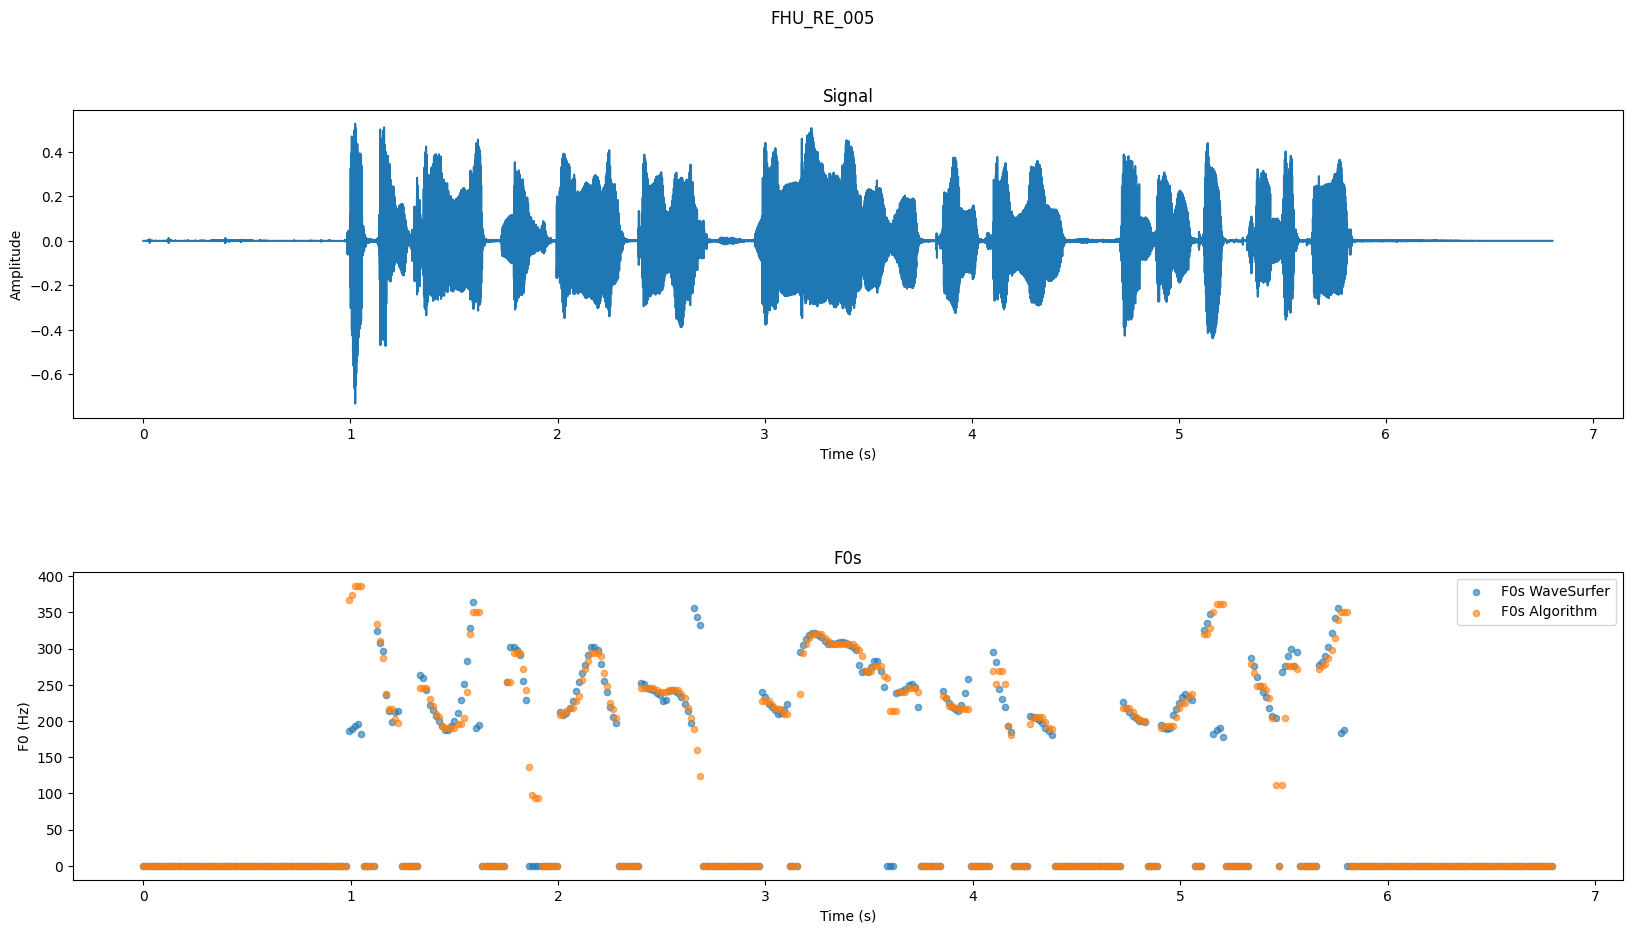

In [3]:
compare('FHU_RE_005')

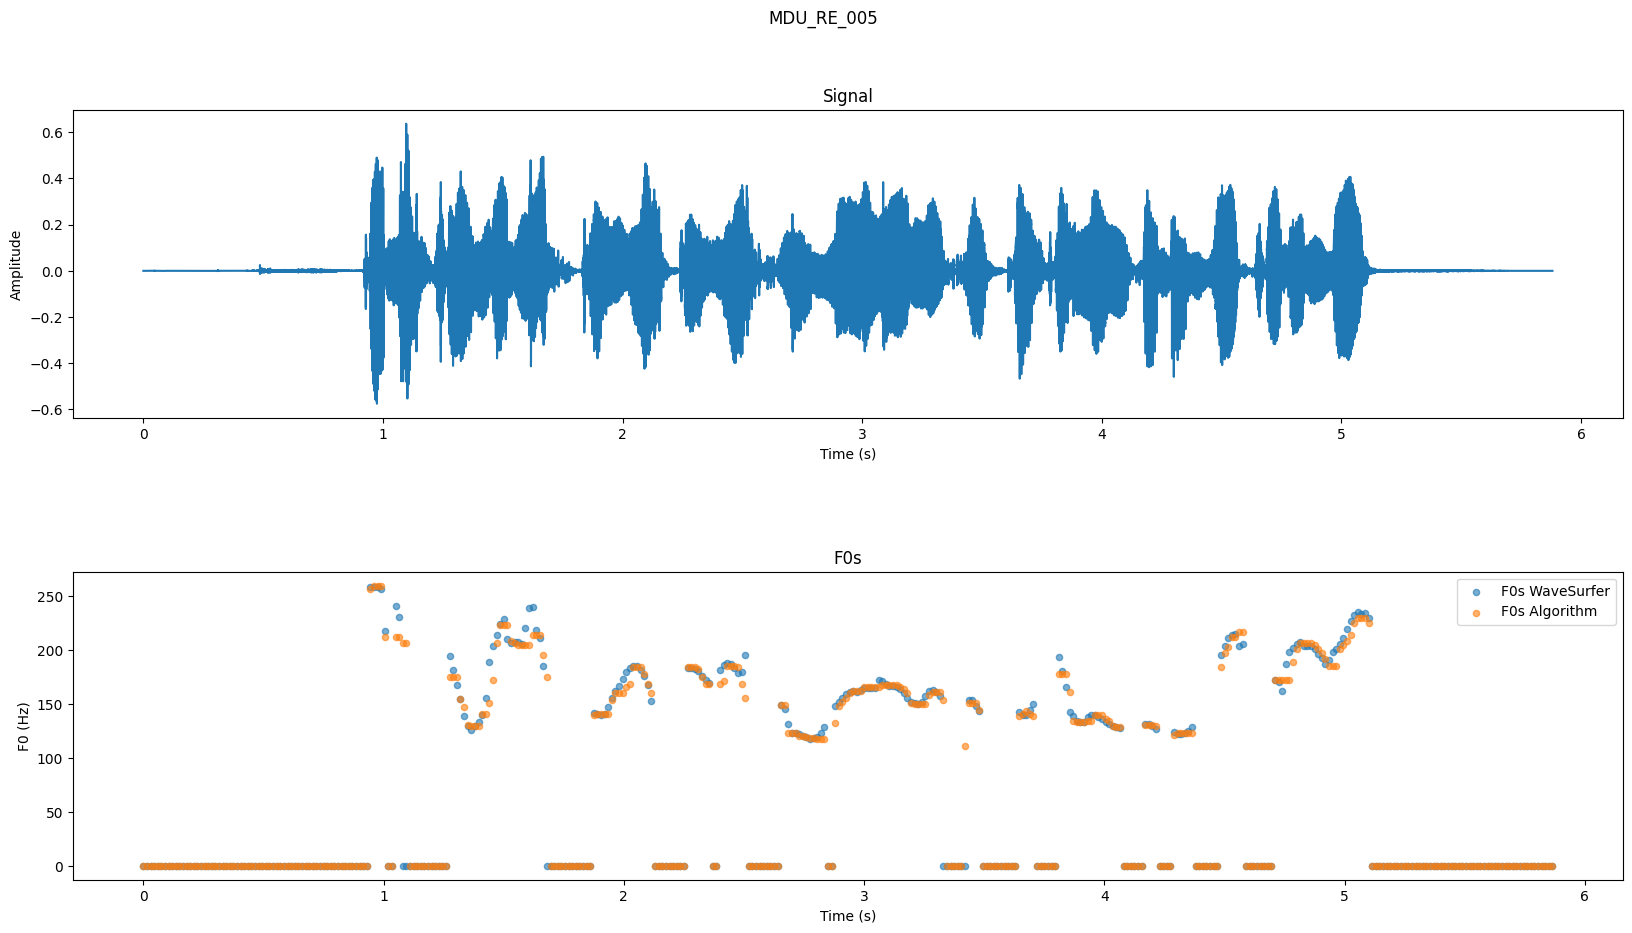

In [4]:
compare('MDU_RE_005')

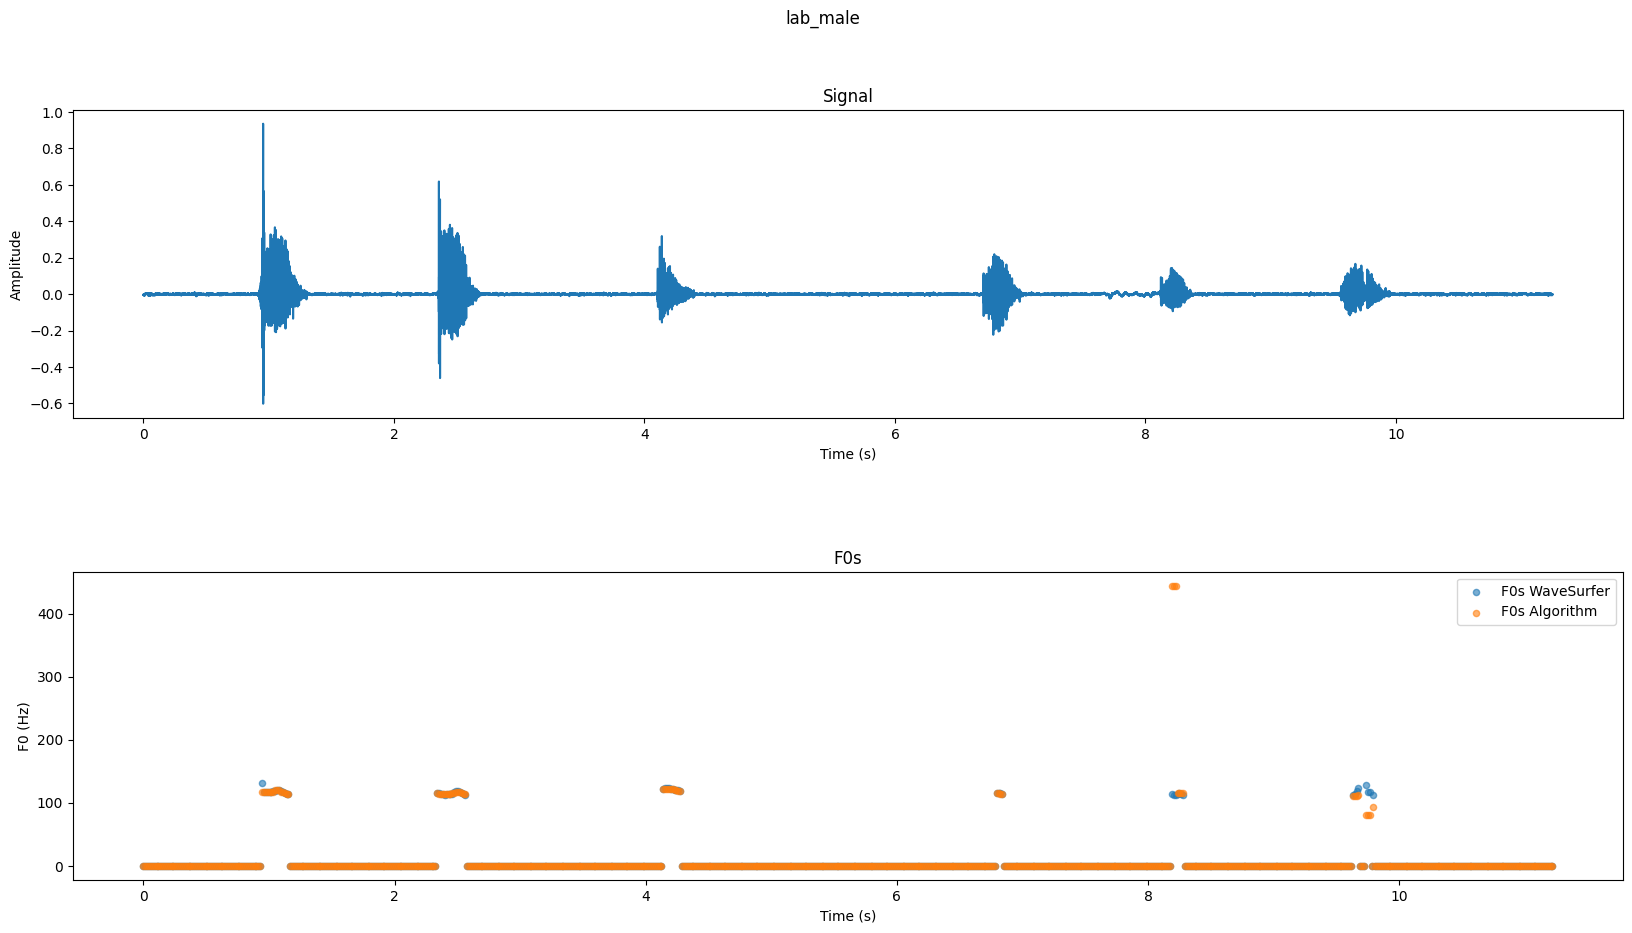

In [5]:
compare('lab_male')

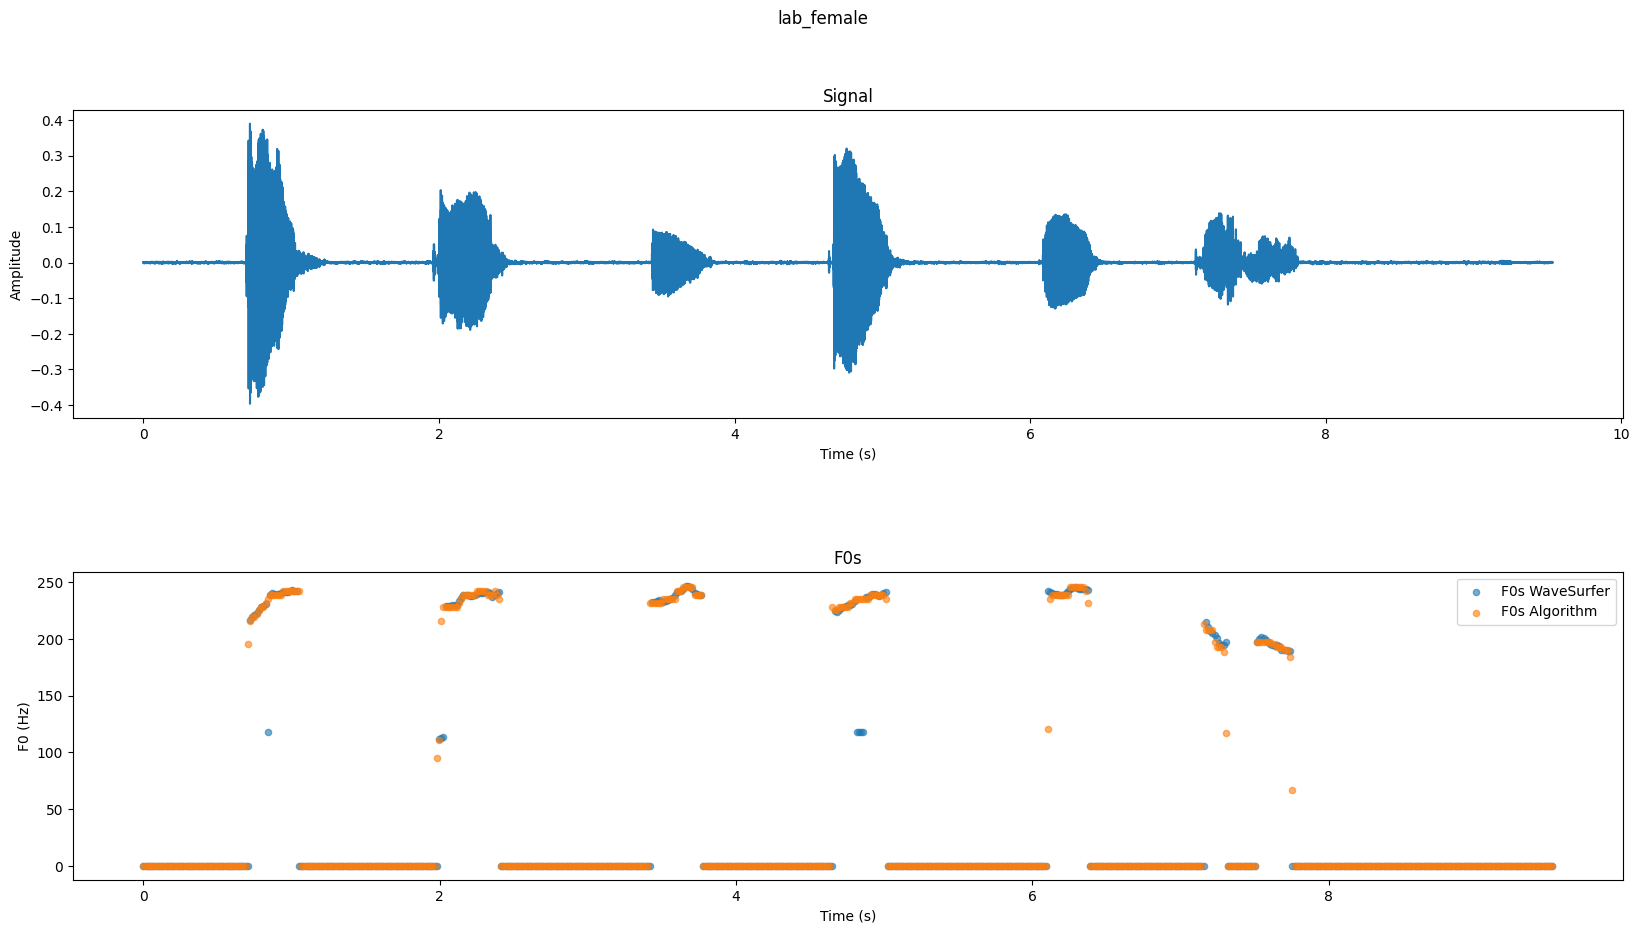

In [6]:
compare('lab_female')

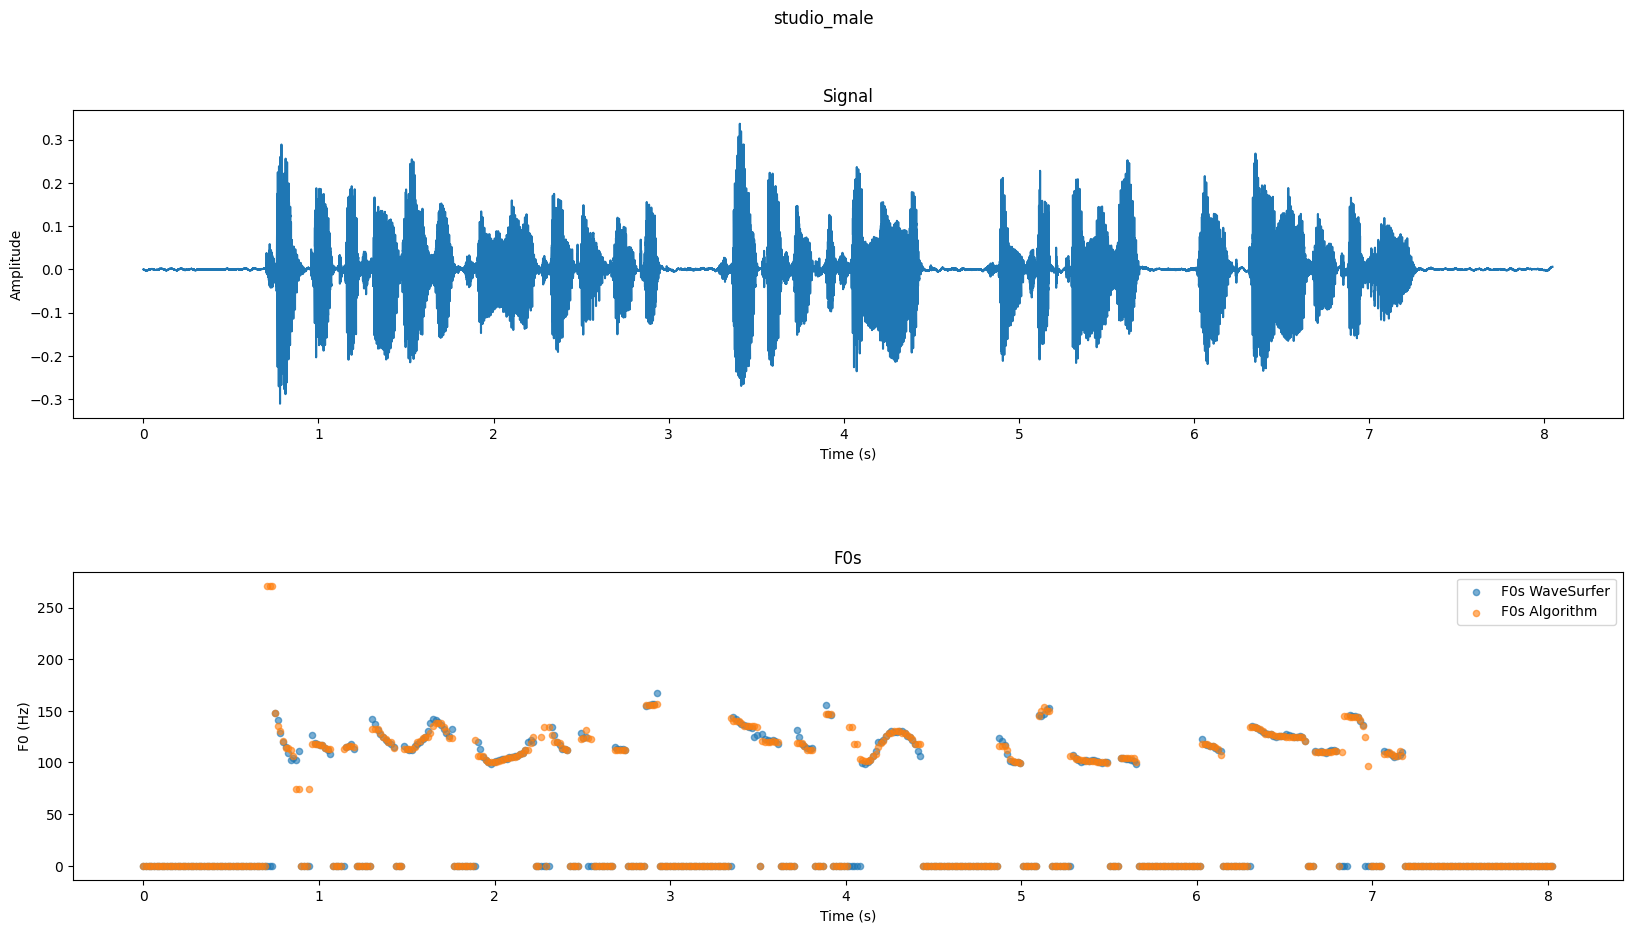

In [7]:
compare('studio_male')

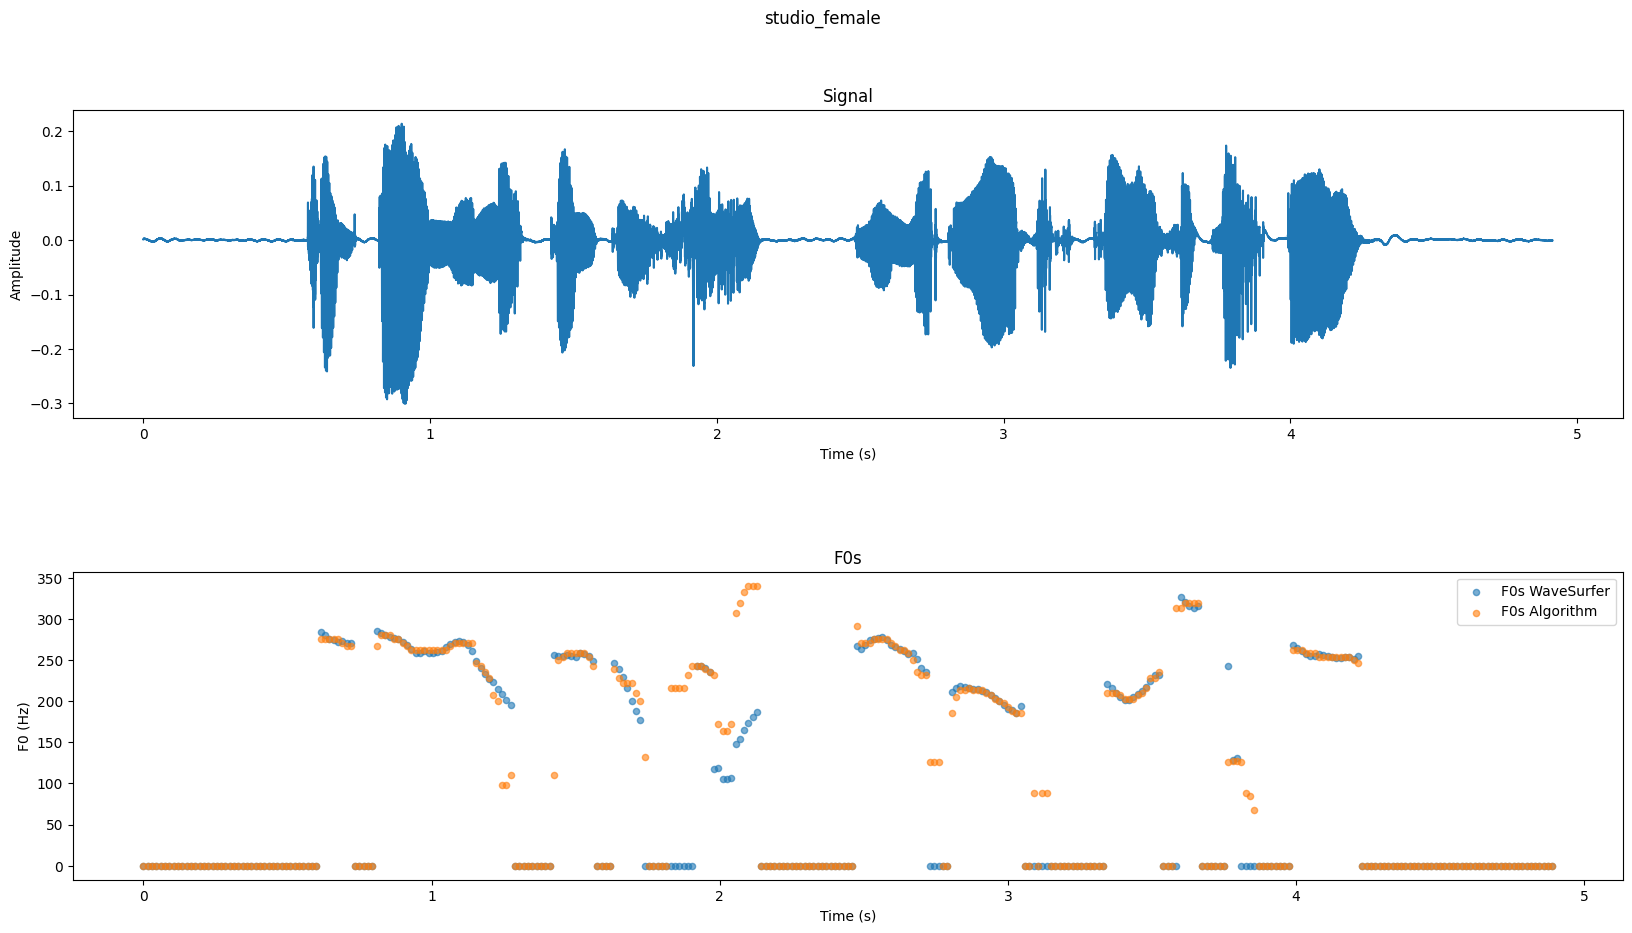

In [8]:
compare('studio_female')